eff_tensor shape: (3, 1, 1, 1000, 1, 1)
eff_line shape: (1000,)


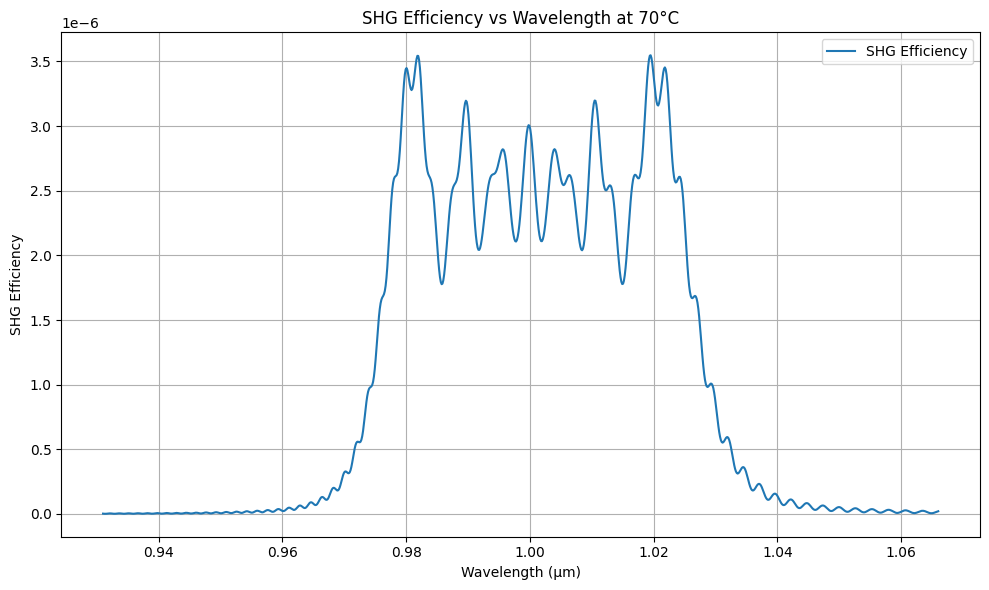

In [1]:
from syuron import shg2
import jax.numpy as jnp
import matplotlib.pyplot as plt

# ドメイン幅と波長範囲の設定
pp_domain_widths = [3.6] * 100
pp_domain_widths2 = [3.4] * 100


def create_pplt_widths(L, Lambda0, chirp_factor=0.0):
    widths = []
    z_current = 0.0
    while z_current < L:
        # 現在位置での周期長を計算（チャープ関数）
        # chirp_factor = 0 の場合は均一な構造になる
        current_lambda = Lambda0 / (1 + chirp_factor * z_current)
        half_period = current_lambda / 2.0
        widths.append(half_period)
        z_current += current_lambda
    return widths


chirp_domain_widths = create_pplt_widths(2000, 7.2, 0.0001)

wavelength_range = jnp.linspace(0.931, 1.066, 1000).tolist()

# SpectrumParams の設定
params = shg2.SpectrumParams(
    domain_widths_dim=[pp_domain_widths,
                       pp_domain_widths2, chirp_domain_widths],
    kappa_magnitude_dim=[1.31E-5],
    T_dim=[70],
    wavelength_dim=wavelength_range,
    fund_power_dim=[1],
    sh_power_dim=[0]
)

# SHG 効率のスペクトル計算
eff_tensor = shg2.analyzeSpectrum(params)
print("eff_tensor shape:", eff_tensor.shape)  # (1, 1, 1, 1000, 1, 1) となる

# slice を使って、4 番目の次元を抽出（他は 0 番目の要素を選択）
eff_line = eff_tensor[2, 0, 0, :, 0, 0]
print("eff_line shape:", eff_line.shape)  # (1000,)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(wavelength_range, eff_line, label='SHG Efficiency')
plt.xlabel('Wavelength (μm)')
plt.ylabel('SHG Efficiency')
plt.title('SHG Efficiency vs Wavelength at 70°C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()